In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import math

In [3]:
df = pd.read_csv('../data/processed/Methylation_Idea2.csv')

In [154]:
def plot_comparison_by_chromosome(dictResults, chromosomes, primary_site):
    
    dictChromosomes = {}
    for chromosome in chromosomes:
        results = np.zeros((len(primary_site), len(primary_site)))
        for i, psite1 in enumerate(primary_site):
            for j, psite2 in enumerate(primary_site):
                """if (dictResults[psite1][chromosome] == 0) or (dictResults[psite2][chromosome] == 0):
                    results[i][j] = np.nan
                else:"""
                results[i][j] = math.log((dictResults[psite1][chromosome]+1) / (dictResults[psite2][chromosome]+1), 2)
                
        dictChromosomes[chromosome] = results
    return dictChromosomes

def comparison_byChromosome_byGene(df, positionIni, positionEnd, chromosome):
    
    primary_site = np.unique(df['PRIMARY_SITE'].values)
    dictFinal = {}
    for psite in primary_site:
        dfC = df[(df['CHROMOSOME'] == chromosome) & (df['PRIMARY_SITE'] == psite)]
        dfM = dfC[(dfC['POSITION'] >= positionIni) & (dfC['POSITION'] < positionEnd)]['METHYLATION']
        dfMVC =  dfM.value_counts()
        if 'H' not in dfMVC:
            dictFinal[psite] = 0.0
        else:
            dictFinal[psite] = float(dfMVC['H']) / dfM.shape[0] 


    results = np.zeros((len(primary_site), len(primary_site)))
    for i, psite1 in enumerate(primary_site):
        for j, psite2 in enumerate(primary_site):
            results[i][j] = math.log((dictFinal[psite1]+1) / (dictFinal[psite2]+1), 2)

    return results


### All all cancer types vs all cancer types by chromosome

In [101]:
FCResults = plot_comparison_by_chromosome(dictResults, np.unique(df['CHROMOSOME'].values), np.unique(df['PRIMARY_SITE'].values))

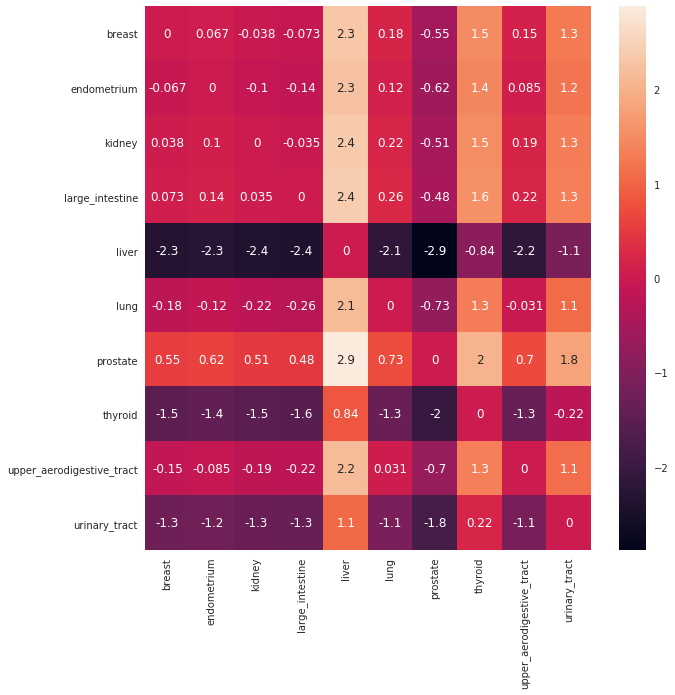

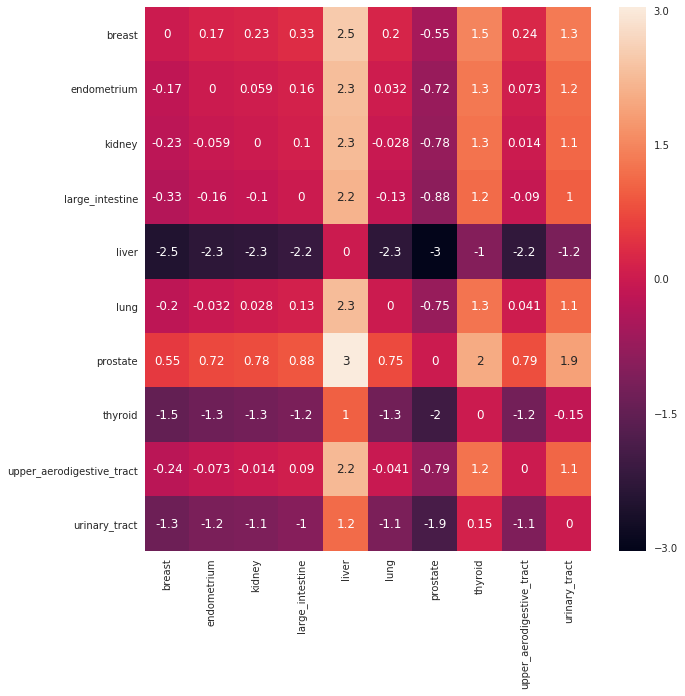

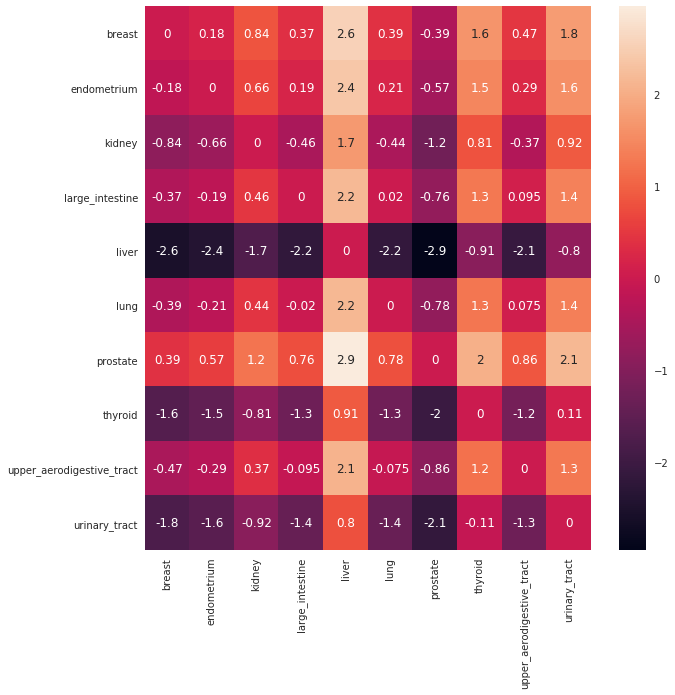

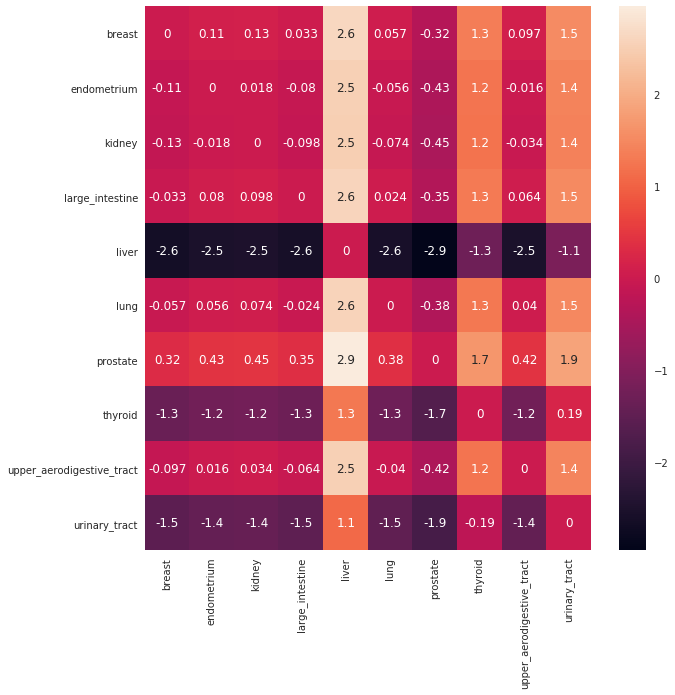

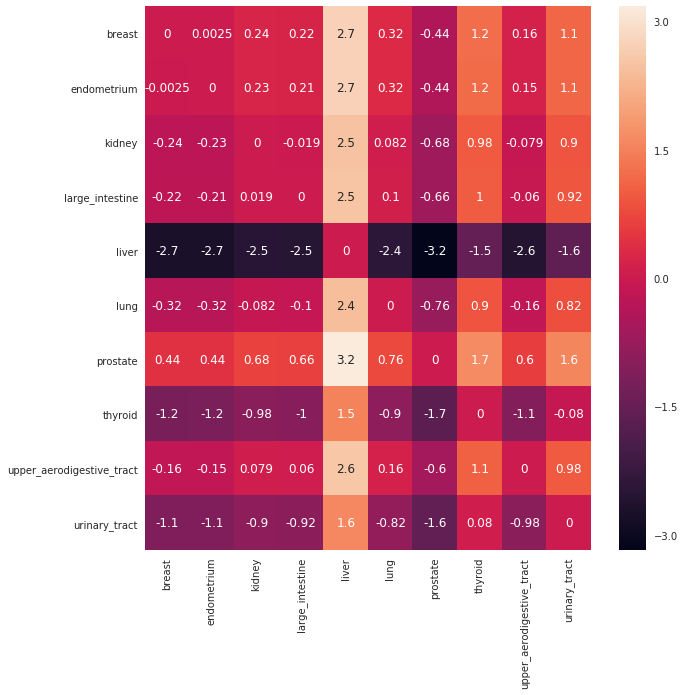

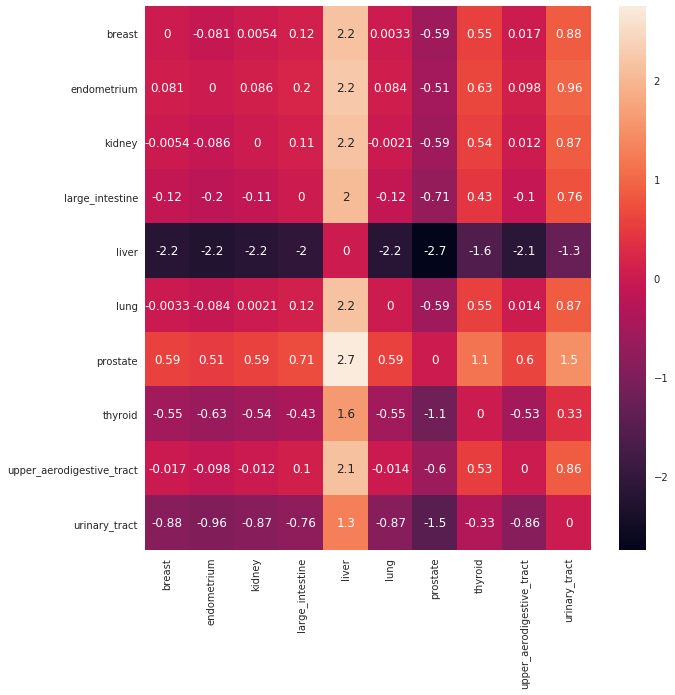

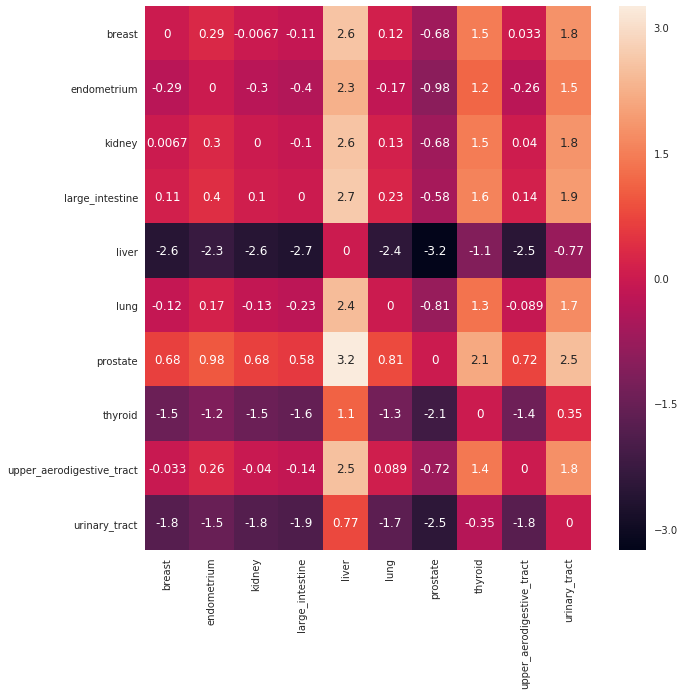

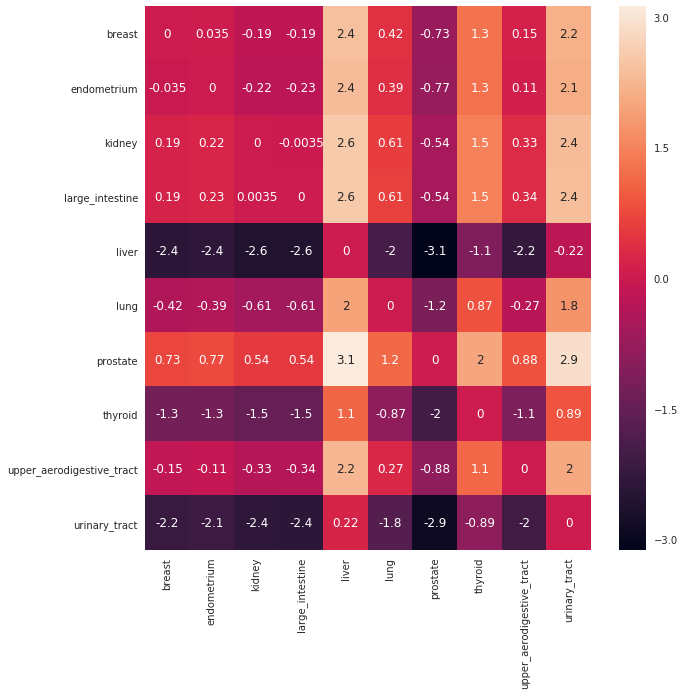

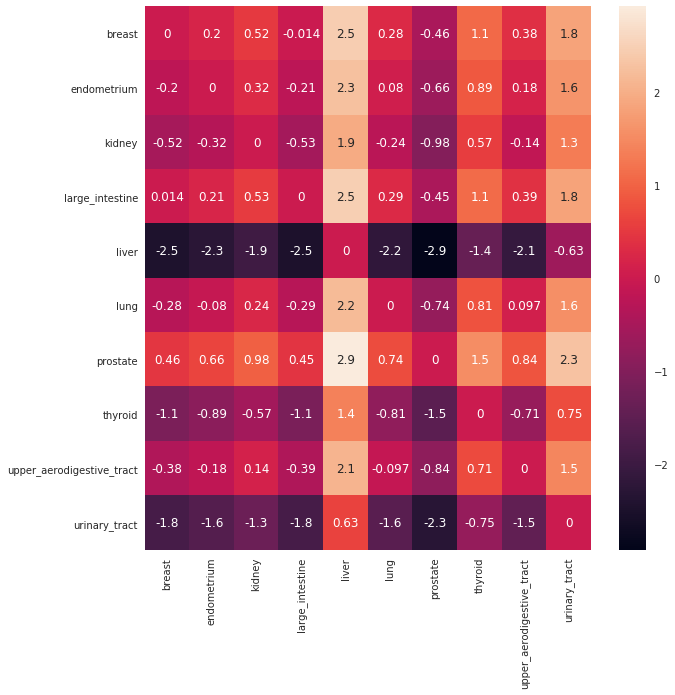

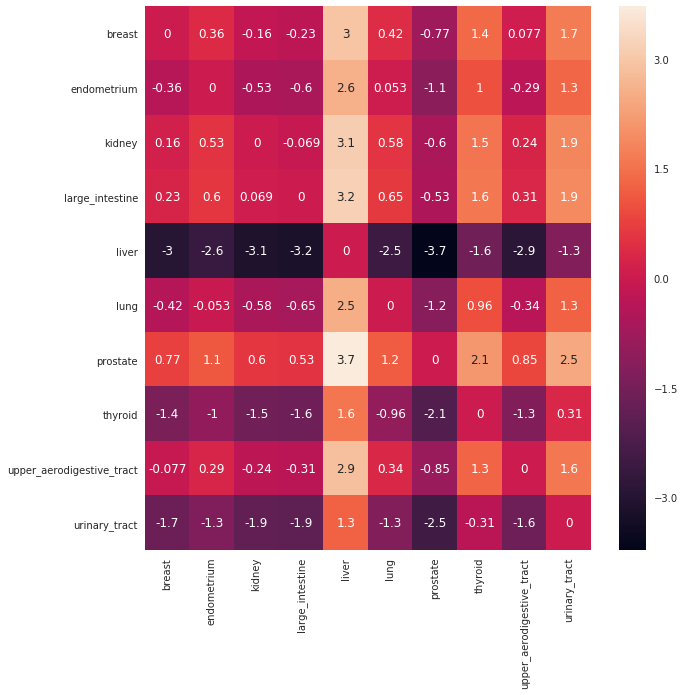

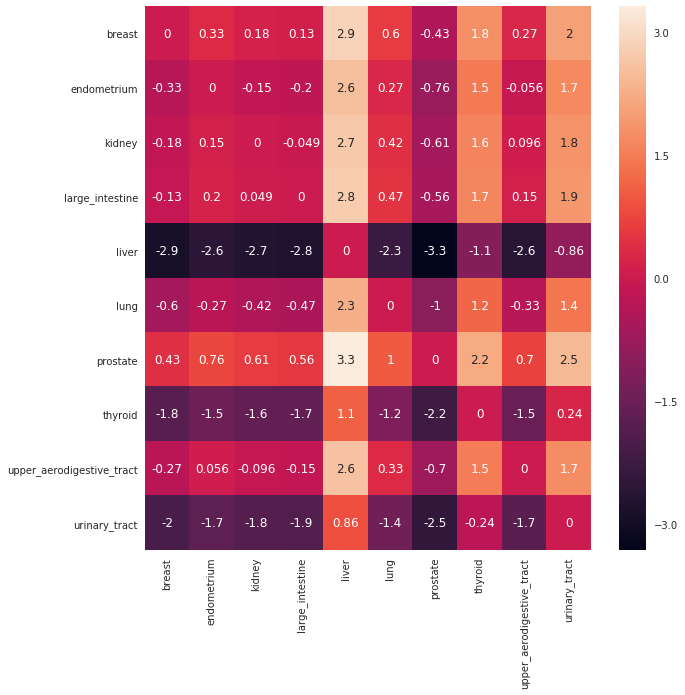

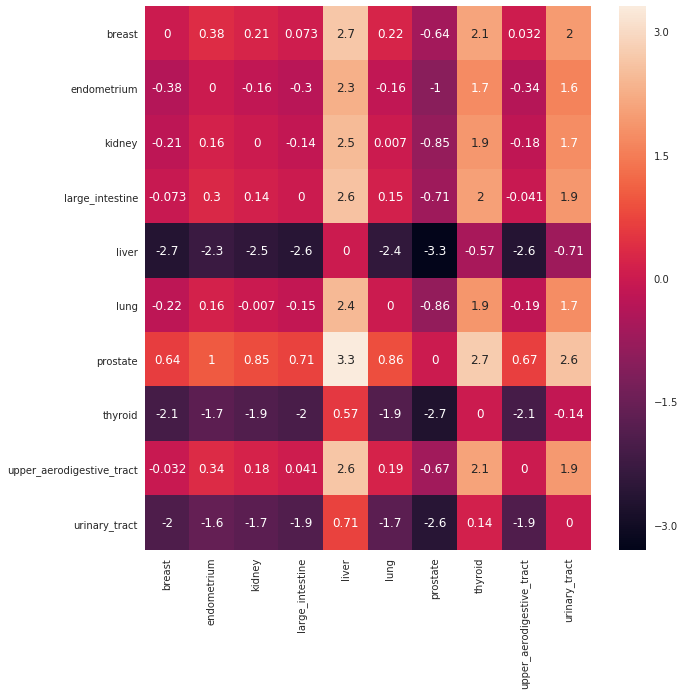

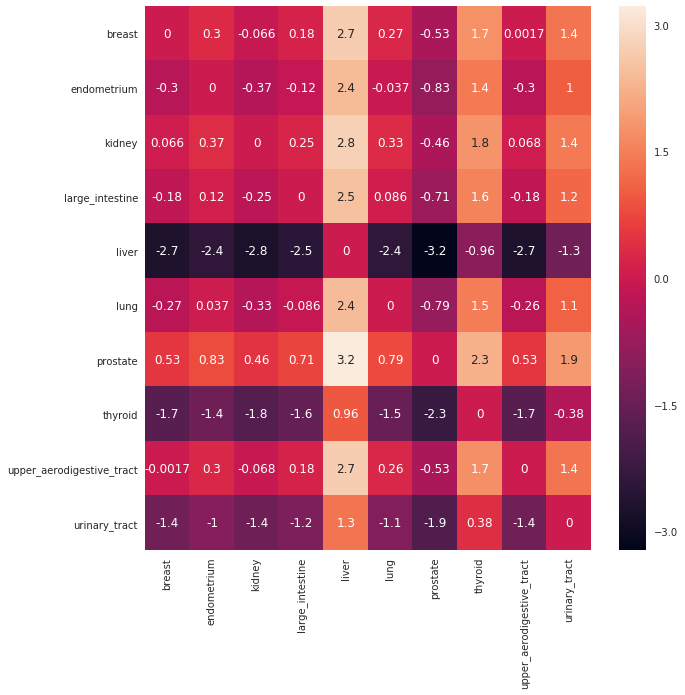

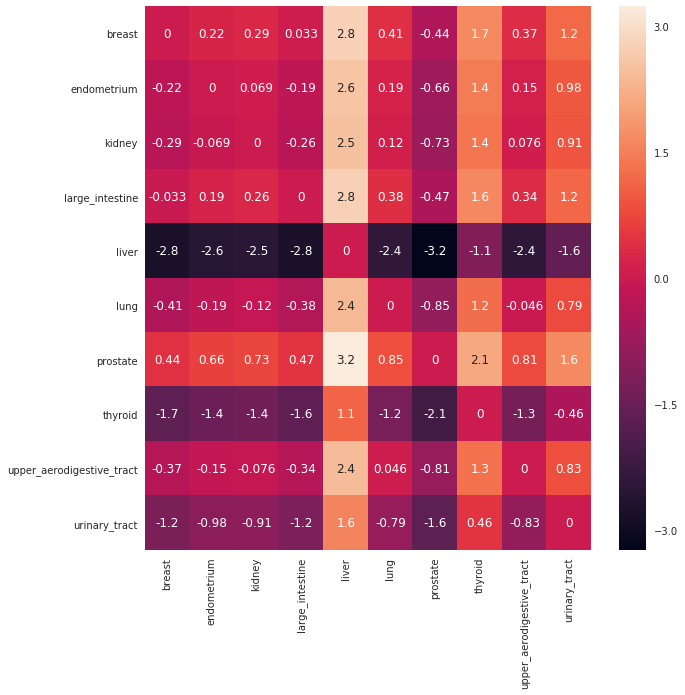

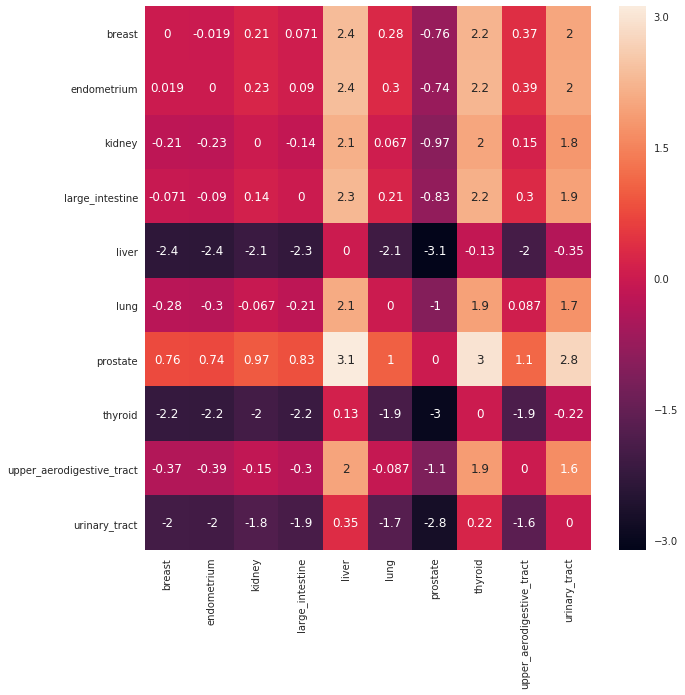

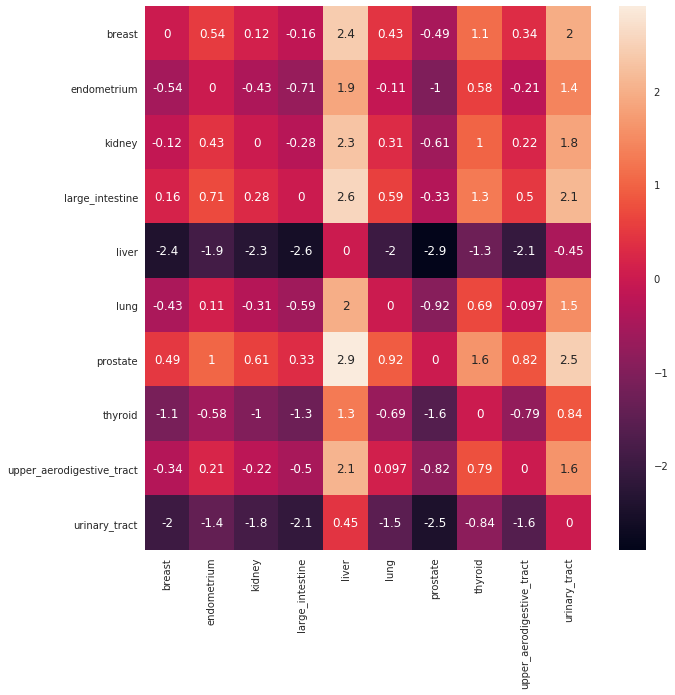

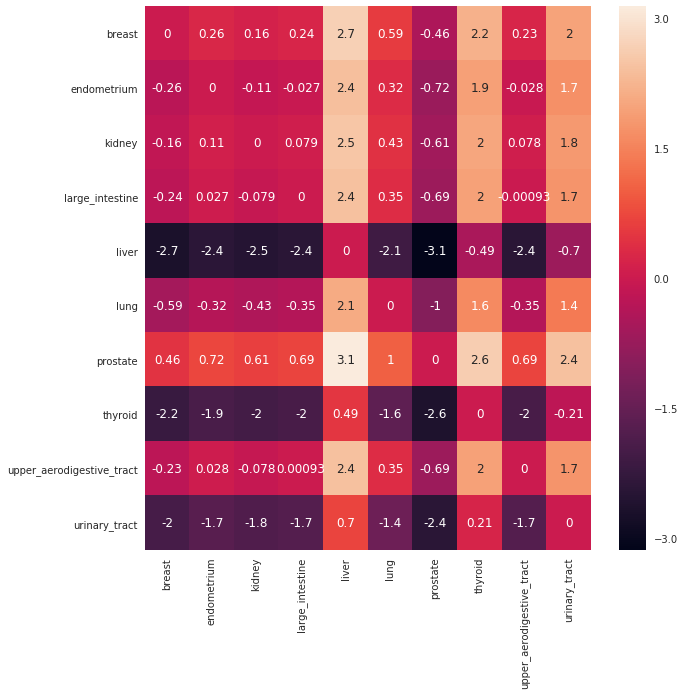

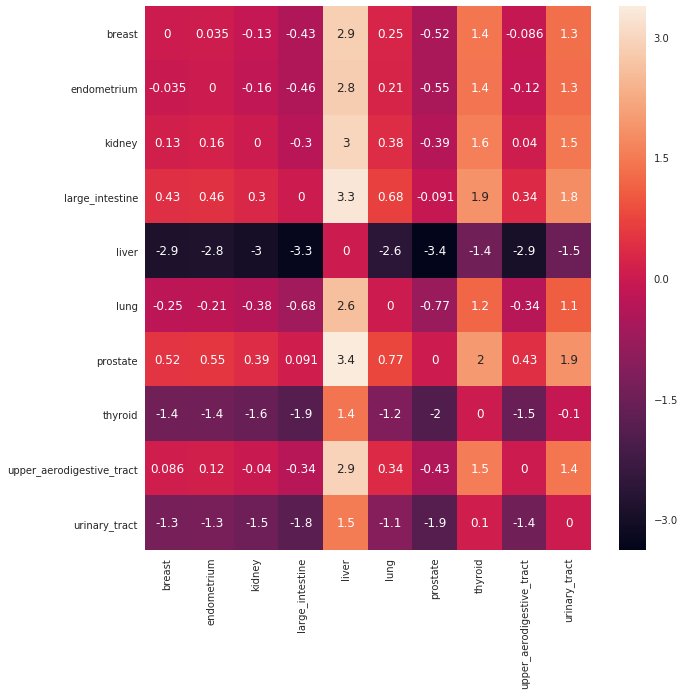

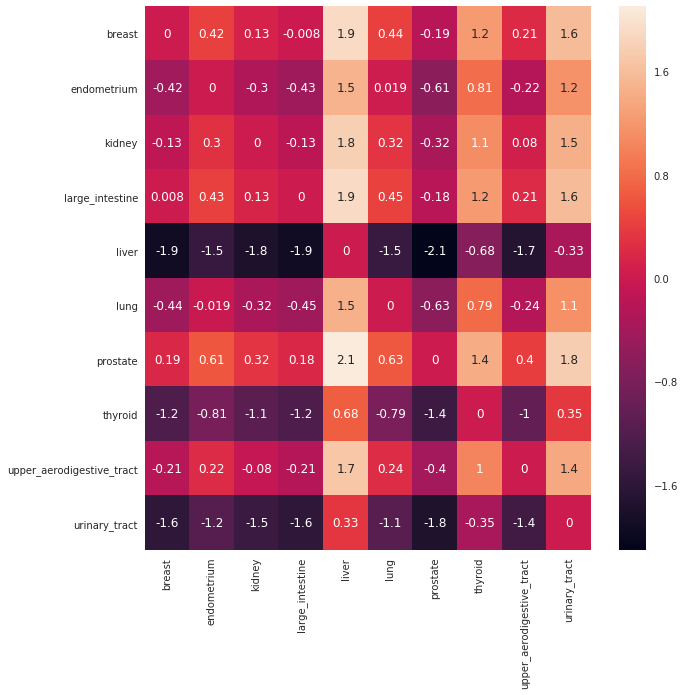

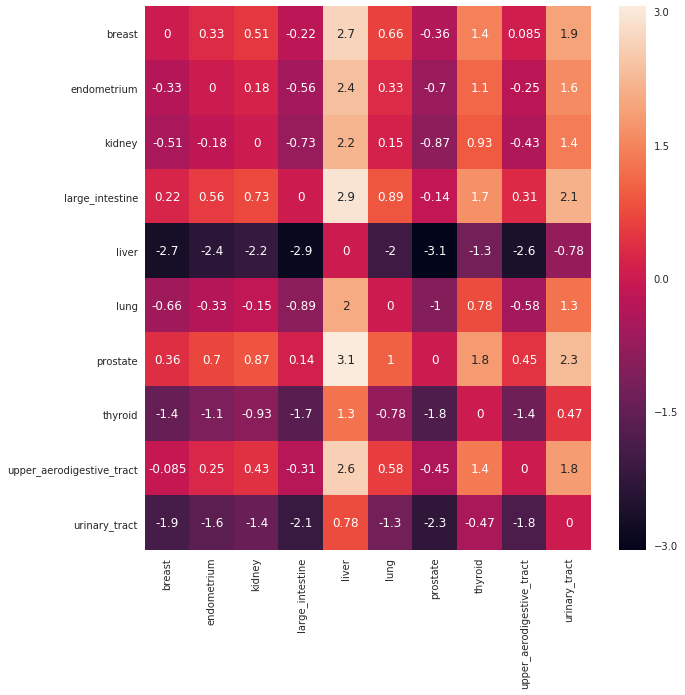

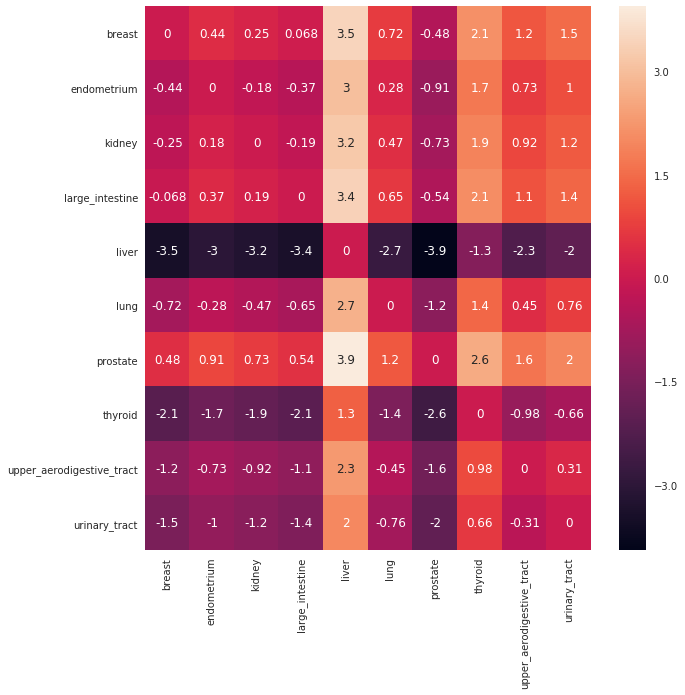

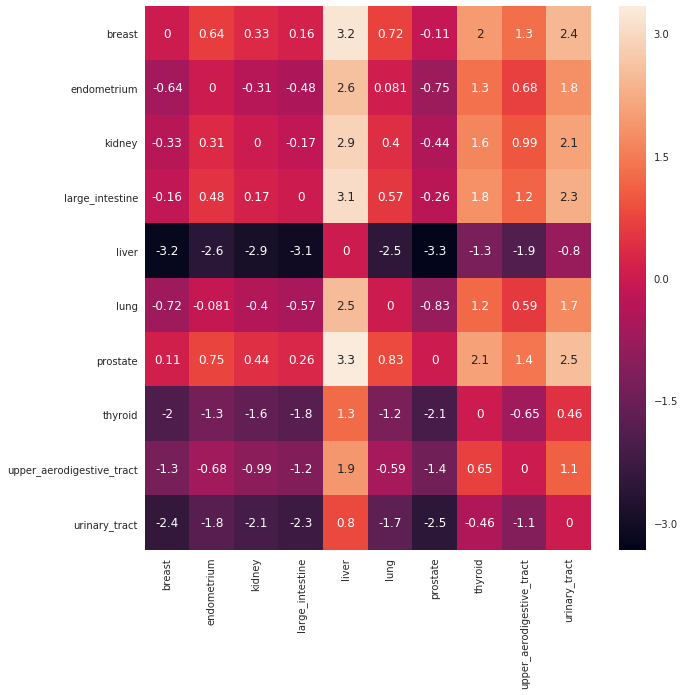

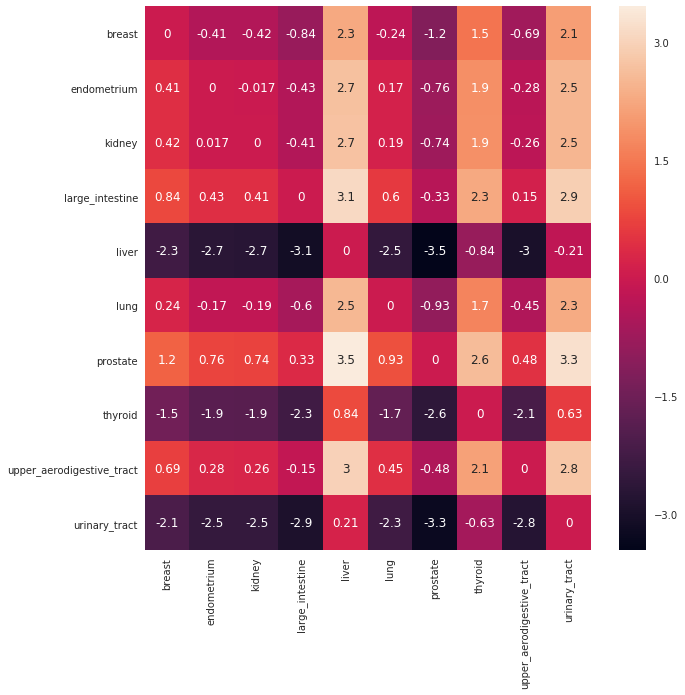

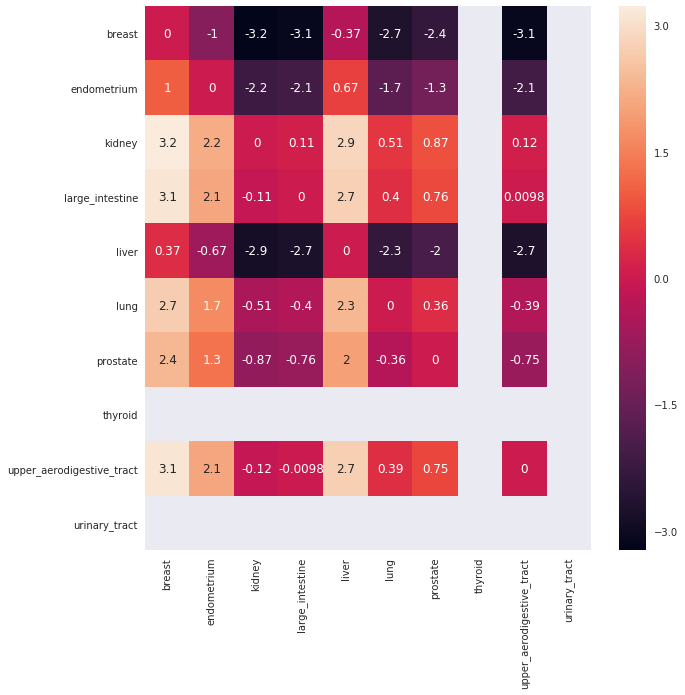

In [150]:
for chromosome in np.unique(df['CHROMOSOME'].values):
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(FCResults[chromosome], xticklabels=np.unique(df['PRIMARY_SITE'].values), yticklabels=np.unique(df['PRIMARY_SITE'].values), ax=ax, annot=True)
    plt.savefig('../plots/Heatmap_CancerVSCancer_{}.png'.format(chromosome))

### Genes APC, CDKN2A, GSTP1

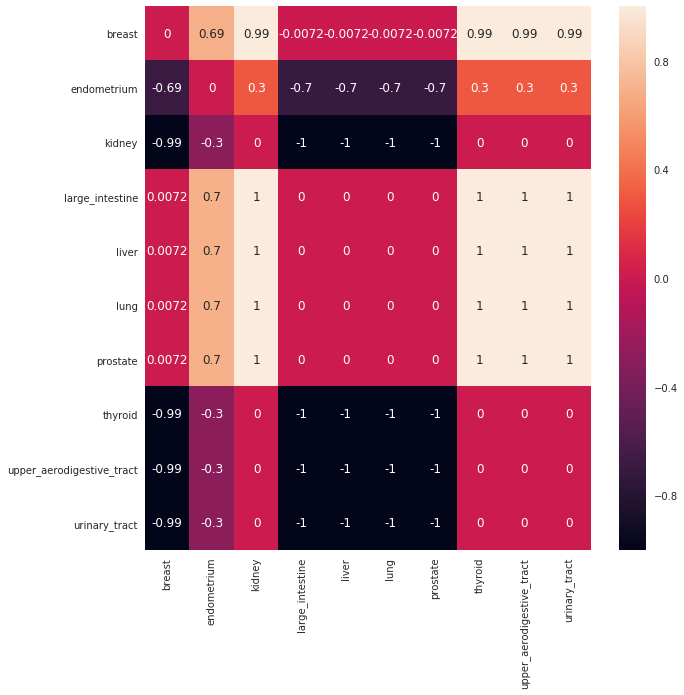

In [158]:
ResultsAPC = comparison_byChromosome_byGene(df, 112707498, 112846239, 5)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(ResultsAPC, xticklabels=np.unique(df['PRIMARY_SITE'].values), yticklabels=np.unique(df['PRIMARY_SITE'].values), ax=ax, annot=True)
plt.savefig('../plots/Heatmap_CancerVSCancer_APC.png')

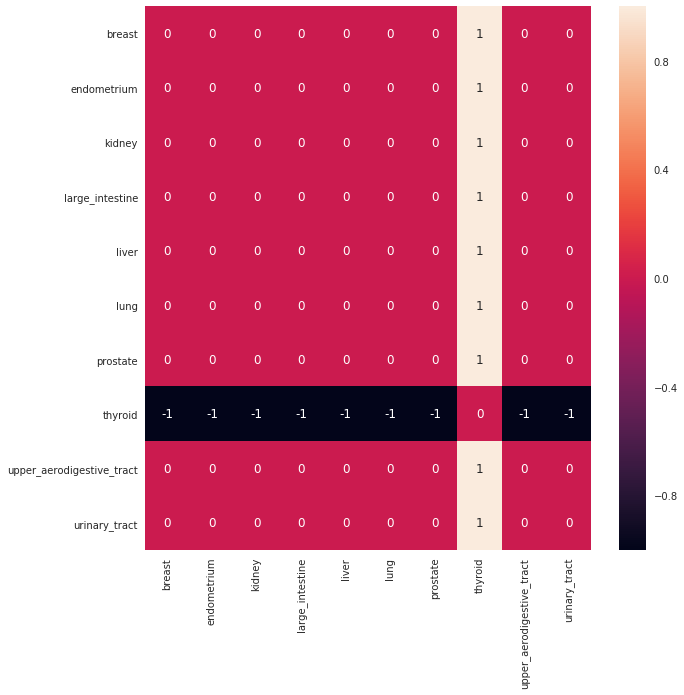

In [159]:
ResultsCDKN2A = comparison_byChromosome_byGene(df, 21967752, 21995301, 9)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(ResultsCDKN2A, xticklabels=np.unique(df['PRIMARY_SITE'].values), yticklabels=np.unique(df['PRIMARY_SITE'].values), ax=ax, annot=True)
plt.savefig('../plots/Heatmap_CancerVSCancer_CDKN2A.png')

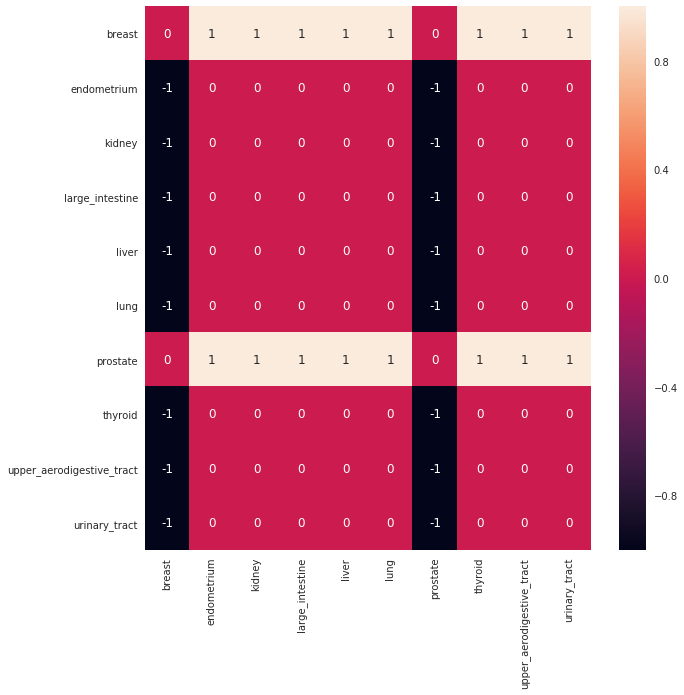

In [157]:
ResultsGSTP1 = comparison_byChromosome_byGene(df, 67583595, 67586660, 11)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(ResultsGSTP1, xticklabels=np.unique(df['PRIMARY_SITE'].values), yticklabels=np.unique(df['PRIMARY_SITE'].values), ax=ax, annot=True)
plt.savefig('../plots/Heatmap_CancerVSCancer_GSTP1.png')